In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import cv2
import sys

# Configuración de rutas y carga de config
ROOT_DIR = Path().resolve().parents[1]
sys.path.append(str(ROOT_DIR))
from src.utils.config_loader import load_config
cfg = load_config()

In [12]:
CLASS_MAP = cfg["dataset"]["class_names"] 

In [21]:
all_labels_path = ROOT_DIR / cfg["paths"]["processed_path"] / "all_labels"
splits_path = ROOT_DIR / cfg["paths"]["splits_path"]

# Análisis de distribución de clases (data/processed/)

In [19]:
def analyze_processed_labels(label_dir):
    counts = {name: 0 for name in CLASS_MAP.values()}
    total_annotations = 0

    label_files = list(Path(label_dir).glob("*.txt"))
    for label_file in label_files:
        with open(label_file, 'r') as f:
            for line in f:
                parts = line.split()
                if not parts: continue
                cls_id = int(parts[0])
                if cls_id in CLASS_MAP:
                    counts[CLASS_MAP[cls_id]] += 1
                    total_annotations += 1

    return counts, len(label_files), total_annotations

Total de imágenes procesadas: 2927
Total de anotaciones detectadas: 34102


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7120\3551238742.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


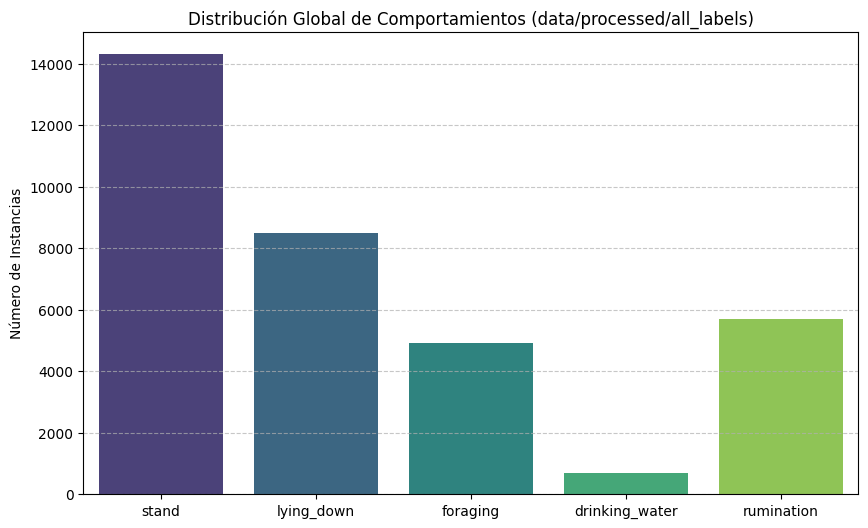

In [22]:
# Ejecución sobre all_labels
counts, n_imgs, n_anns = analyze_processed_labels(all_labels_path)

print(f"Total de imágenes procesadas: {n_imgs}")
print(f"Total de anotaciones detectadas: {n_anns}")

# Visualización Global
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")
plt.title("Distribución Global de Comportamientos (data/processed/all_labels)")
plt.ylabel("Número de Instancias")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Validación de Splits (data/splits/)

In [4]:
def check_splits(split_root):
    split_stats = {}
    for split in ['train', 'val', 'test']:
        path = Path(split_root) / split / 'labels'
        counts, _, _ = analyze_processed_labels(path)
        split_stats[split] = counts
    return pd.DataFrame(split_stats)

Resumen de instancias por Split:


,train,val,test
stand,11218,2379,713
lying_down,6643,1229,613
foraging,3908,825,187
drinking_water,556,105,30
rumination,4442,861,393


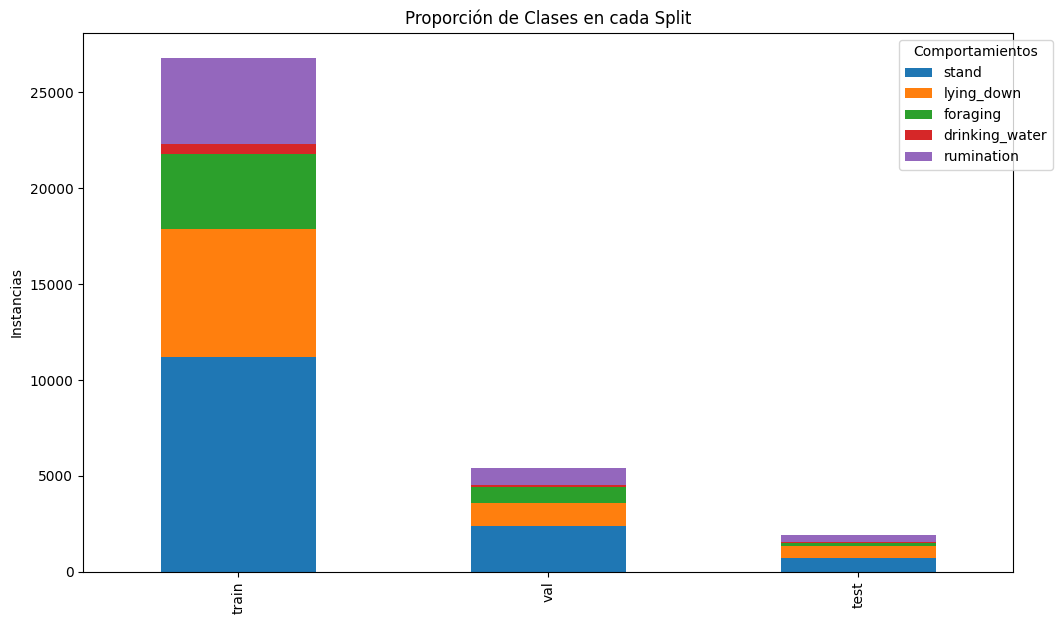

In [23]:
df_splits = check_splits(splits_path)

# Mostrar tabla de proporciones
print("Resumen de instancias por Split:")
display(df_splits)

# Gráfico comparativo de proporciones
df_splits.T.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("Proporción de Clases en cada Split")
plt.legend(title="Comportamientos", bbox_to_anchor=(1.05, 1))
plt.ylabel("Instancias")
plt.show()